Multiple Linear Regression and violated model assumptions

#### 1. In principle, there are two possible failure scenarios when model assumptions are violated, (1) “silent failure”: the model makes estimates, but due to the violations they are misleading; (2) “error” the model is not able to work and cannot provide estimates. List the 3 important model assumptions stated in the lecture and annotate to which failure scenario either belongs to. Justify.

Assumptions:

1-Model residuals are normally distributed.

2-p < n (fewer regressors than data points). 

3-No collinearities: No variable can be written as a linear combination of other variables.

violation of Model "residuals are normally distributed" is a silent failure, because the estimate parameter are biased and could lead to incorrect inference and may not reflect the realtionship between independent and dependent variables.

violation of Model p < n (fewer regressors than data points) is also a silent failure because it may fit noise and cause overfitting.

violation of "No collinearities: No variable can be written as a linear combination of other variables" is an error because there is a chance that the regression coefficients' standard errors are overstated. due to this, the coefficient estimates may be less accurate and the confidence intervals may be broader than they would be if the variables were not collinear.


### Import Data sets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


mlr_vma=pd.read_csv('mlr_vma.csv',delimiter=';')

y_mlr_vma=pd.read_csv('y_mlr_vma.csv',delimiter=';')

mlr_vma=mlr_vma.drop(columns=['Unnamed: 0'])
y_mlr_vma=y_mlr_vma.drop(columns=['Unnamed: 0'])

print(mlr_vma.head())
print(y_mlr_vma.head())

            0         1         2         3         4         5         6  \
0  -47.917424  1.356240  0.744463 -0.645120 -0.454320  0.361636 -1.196207   
1  146.564877  0.110923  0.264041 -0.291694  0.507493 -0.600639 -1.424748   
2  -21.967189 -0.501757 -0.383730  0.513267  0.578153 -0.529760 -0.518270   
3   32.408397  0.931280 -0.670939  0.975545 -0.713919  0.331263  0.611676   
4   73.846658 -0.719844  1.716209 -1.763040 -0.688602  0.343618 -0.301104   

          7         8         9  
0  0.812526 -0.185659 -1.106335  
1 -0.544383 -0.225776  0.067528  
2 -0.808494  0.357113  1.477894  
3  1.031000 -0.385082 -0.676922  
4 -1.478522  0.171368 -0.115648  
           y
0 -37.395291
1  57.080023
2  15.940968
3  -2.437328
4  32.772880


### 2. Perform an EDA (explanatory data analysis) to identify and correct violations.

#### a. Compute a Pearsons’ correlation matrix np.corrcoef and read carefully the description of parameters “x” and “rowvar”. Visualize the correlations with a seaborn heatmap (set the argument “annot=True” to display correlation coefficients).

<AxesSubplot:>

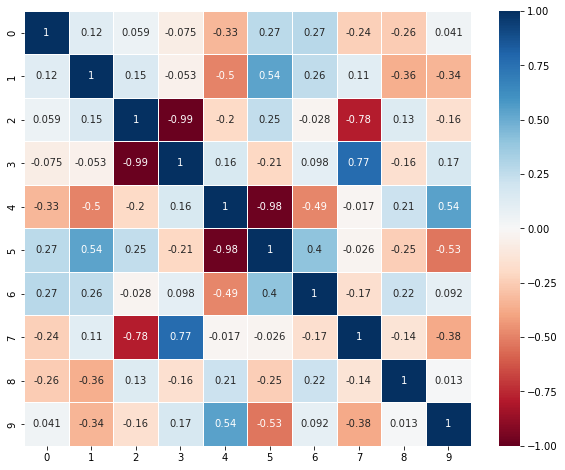

In [2]:
'''
plot a heatmap using Pearsons'correlation matrix
'''

corr=np.corrcoef(x=mlr_vma,rowvar=False)
plt.figure(figsize=(10, 8))
sb.heatmap(corr,annot=True,cmap='RdBu',vmin=-1, vmax=1,linewidths=1)

In [3]:
'''
we want to know if p < n
'''

print("Regressors:",mlr_vma.shape[0])
print("Observations:",mlr_vma.shape[1])

Regressors: 10
Observations: 10


#### b. From (a) and the shape of the data (number of observations, number of features) detect and name the 2 violated assumptions.

1-p < n (fewer regressors than data points). 
explaination:
the number of regressors is equal to the observations.

2-No collinearities: No variable can be written as a linear combination of other variables.
explaination:

There are variables that are related to each other inversely (like 2 and 3, along with others) and some directly(like 3 and 7 along with others).


#### c. Correct for violated assumptions. Justify. Note: There is no unique solution, different valid solutions are possible. 

In [4]:
import pandas as pd
import numpy as np

'''
Since we've been given liberty to deal with this question as we see fit, we chose 
to drop some colums. However we chose to drop columns based on 

'''
corr_ = (mlr_vma).corr().abs()


'''
The below line creates a trianglar matrix, where the upper martix containing the same values as the relation matrix
however, the diagonal and the lower triangle is excluded.
'''
relationship_traingle = corr_.where(np.triu(np.ones(corr_.shape), k=1).astype(np.bool))

'''
we here exclude all values above 70%
'''
correlated_features = [column for column in relationship_traingle.columns if any(relationship_traingle[column] > 0.7)]
print('The columns we want to drop:', correlated_features)

mlr_vma=mlr_vma.drop(columns=correlated_features)

col=list(mlr_vma.columns)#save colums values for later use


The columns we want to drop: ['3', '5', '7']


/var/folders/5k/byptyw6922b1lmjgkf16_qxh0000gn/T/ipykernel_79368/2599924099.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  relationship_traingle = corr_.where(np.triu(np.ones(corr_.shape), k=1).astype(np.bool))


<AxesSubplot:>

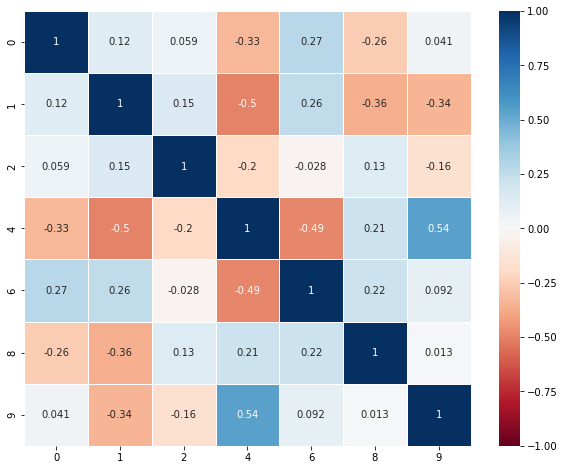

In [5]:
'''
We plot the heatmap one more time to check the correlations
'''

cor=np.corrcoef(x=mlr_vma,rowvar=False)
plt.figure(figsize=(10, 8))
sb.heatmap(cor,annot=True,cmap='RdBu',xticklabels=mlr_vma.columns,yticklabels=mlr_vma.columns,vmin=-1, vmax=1,linewidths=1)

### Fit a linear regression model using statsmodels linear regression

## 3. Fit a linear regression model using statsmodels linear regression

#### a. Standardize the data to range [0,1] Hint: Use standard scaler

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


'''
We are using StandardScaler function to scale our data (for both independent and dependent variables) 
and MinMaxScaler to range the values from 0 to 1.
'''

x = StandardScaler()

x.fit(mlr_vma)

tranformed_x = x.transform(mlr_vma)

ranges = MinMaxScaler(feature_range=(0, 1))

ranges.fit(tranformed_x)

scaled_data_01 = ranges.transform(tranformed_x)

mlr_vma=pd.DataFrame(scaled_data_01)

mlr_vma.columns = pd.RangeIndex(len(mlr_vma.columns))

mlr_vma.columns = col
print('Scaled independent variables')
print(mlr_vma)





y = StandardScaler()

y.fit(y_mlr_vma)

tranformed_y = y.transform(y_mlr_vma)

ranges1 = MinMaxScaler(feature_range=(0, 1))

ranges1.fit(tranformed_y)

scaled_data_02 = ranges1.transform(tranformed_y)

y_mlr_vma=pd.DataFrame(scaled_data_02)

y_mlr_vma.columns = pd.RangeIndex(len(y_mlr_vma.columns))

y_mlr_vma.columns = ['y']

print('Scaled dependent variables')

print(y_mlr_vma)

Scaled independent variables
          0         1         2         4         6         8         9
0  0.059270  1.000000  0.475869  0.134532  0.206179  0.120824  0.000000
1  1.000000  0.558360  0.314348  0.632972  0.140467  0.103517  0.454241
2  0.184794  0.341079  0.096562  0.669590  0.401104  0.354978  1.000000
3  0.447814  0.849292  0.000000  0.000000  0.725995  0.034792  0.166167
4  0.648255  0.263736  0.802578  0.013120  0.463546  0.274847  0.383359
5  0.000000  0.086061  0.143645  1.000000  0.246000  1.000000  0.422887
6  0.465862  0.810502  1.000000  0.217445  1.000000  0.864435  0.414247
7  0.066892  0.319612  0.752006  0.873109  0.000000  0.000000  0.521741
8  0.338009  0.000000  0.272877  0.273211  0.455909  0.618796  0.156442
9  0.531317  0.435988  0.079645  0.466890  0.988035  0.141270  0.678742
Scaled dependent variables
          y
0  0.000000
1  1.000000
2  0.564552
3  0.370022
4  0.742714
5  0.553023
6  0.903677
7  0.111402
8  0.572110
9  0.667346


### b. Report and interpret the model summary.

In [7]:
'''
here we feed the linear regressoin model with y values and x values and add consonant as a 
starting point for the algorithm and print a summary report
'''

import statsmodels.api as sm

linear_reg = sm.OLS((y_mlr_vma),sm.add_constant(mlr_vma)).fit()

print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.281e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.89e-05
Time:                        23:08:44   Log-Likelihood:                 58.450
No. Observations:                  10   AIC:                            -100.9
Df Residuals:                       2   BIC:                            -98.48
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1188      0.002    -53.948      0.0

/Users/sulaimannedal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The model doesn't seem heavily skewed, hence, it is normally distributed.

R and Adj. R-squared are 1 which means that the data in perfectly fitted.

F-statistic and Prob (F-statistic) indicate that there is strong evidence in favor of the model's significance.

The estimated impact of each independent variable on the dependent variable is shown by the coefficients, and it is obvious that columns 0, 8, and 9 are the most significant, and the T-statistic elaborate thier signaficance.

The standard error show that the variables don't vary much.

P>|t| shows that the relationship between these variables 1, 2, 4, 6  and the dependant variable is Probably due to chances since there values are greater than 0.05

[0.025         0.975] these to are both extremes of the 95% interval, it shows the values of the coefficients on the lower and the upper boundary.

### c.How well does the model fit the data? Was it reasonable to use linear regression? Explain.

According to R² and Adj. R² yes, the model fitted perfectly well.

However as wether if it was reasonable to use linear regression or not, we need to know that by achieving a prefect score of 1.000, we have encoutered a very rare event, so this could indicate overfitting. so in theory yes it was reasonable, however, we need to check in case of overfitting or something else.

### d. Are there any significant (p-value <= 5%) feature-related coefficients?Which? Would you expect a change in significance in dependence of the solution in 2c (excersise 3)? Explain.

Yes there are three Coefficients in 0, 8, and 9 are significant since there p values are less than 0.05. They are considered significant.

We expect that a change in significance in independence might change if we chose to keep the colums, because the variables were dependent.

#### d. The data was simulated such that 3 of the 10 features are informative and the remainder 7 are just noise. Which features are most likely informative ones?

Most informative features were: 0 , 8, and 9